http://www.sci.utah.edu/~shireen/pdfs/tutorials/Elhabian_PCA09.pdf

In [65]:
class VectorGround:
    def __init__(self, range=[-3,10], fig_size=(20,20),**kwargs):
        self.plt = plt
        self.plt.figure(figsize=fig_size)
        self.range=range
        self.ax = self.plt.gca()
        self.ax.set_aspect('equal')
        plt.grid()
        self.ax.arrow(0, 0, 1, 0, head_width=0.1, head_length=0.1, fc='blue', ec='black')
        self.ax.arrow(0, 0, 0, 1, head_width=0.1, head_length=0.1, fc='blue', ec='black')

        self.ax.text(1, -0.3, r'$\vec{e}_1$',fontsize=16,color='red')
        self.ax.text(-0.4, 1, r'$\vec{e}_2$',fontsize=16,color='red')
        self.plt.xlim(range[0],range[1])
        self.plt.ylim(range[0],range[1])
        self.ax.set_xlabel('X',fontsize=20)
        
        self.ax.set_ylabel('Y',fontsize=30)
        self.plt.title('',fontsize=10)

        self.plt.savefig('fig1.png', bbox_inches='tight')
    
    def add_v(self,x_0,y_0,x,y,index='1',show_cord=True,font_size=15):
        self.ax.arrow(x_0, y_0, x, y, head_width=0.1, head_length=0.1, fc='black', ec='black')
    
        if show_cord:
            #self.ax.text(x, y-0.2, r'$\vec{r}_{%s}(%1.1f:%1.1f)$' % (index,x, y),fontsize=font_size,color='blue')
            self.ax.text(x, y-0.2, r'$\vec{r}_{%s}(%1.0f:%1.0f)$' % (index,x, y),fontsize=font_size,color='blue')
    def plot_points(self,points,color='b'):
        for p in points:
            self.plt.scatter(p[0],p[1],color=color)

# Priciple Component Analysis Notes

In [12]:
import sys
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
parentdir =parentdir+'/'+'daoutil'
print( parentdir)
sys.path.insert(0,parentdir) 

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#my libs
from dplot import Dplot2D

/home/daodeiv/GIT_PROJECTS/Machine-Learning/daoutil


array([4, 4])

array([4, 4])

In [161]:
k = np.linspace(0,9,10)
f_y = lambda p:(np.random.randint(-100,100)/100)
f_x = lambda k : k
y =np.array([f_y(i) for i in k ])
x =np.array([f_x(i) for i in k ])
a = np.array([x,y])
mx_tr =np.array([[0,-1],[1,0]])
b = mx_tr.dot(a)
z = x*2 + y*3
d = x*4 - y*3
b = np.array([z,d])
a = a.T
b = b.T
matrix = np.append(a,b ,axis=1)


df= pd.DataFrame(matrix)
df.columns=['x','y','z','d']
df.cov()
np.diag(matrix)

array([ 0.  ,  0.55,  2.68, 12.84])

In [173]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df)
#principalDf = pd.DataFrame(data = principalComponents , columns = ['principal component 1', 'principal component 2'])
principalComponents

array([[ 22.4060473 ,   1.41282714],
       [ 17.06668176,   0.3338111 ],
       [ 10.68743686,  -2.95360955],
       [  6.4436585 ,  -1.70591359],
       [  1.49424771,  -1.95677791],
       [ -0.44694065,   4.18095684],
       [ -6.12055312,   2.39209646],
       [-12.4440902 ,  -0.77701681],
       [-17.48634735,  -1.2250601 ],
       [-21.6001408 ,   0.29868643]])

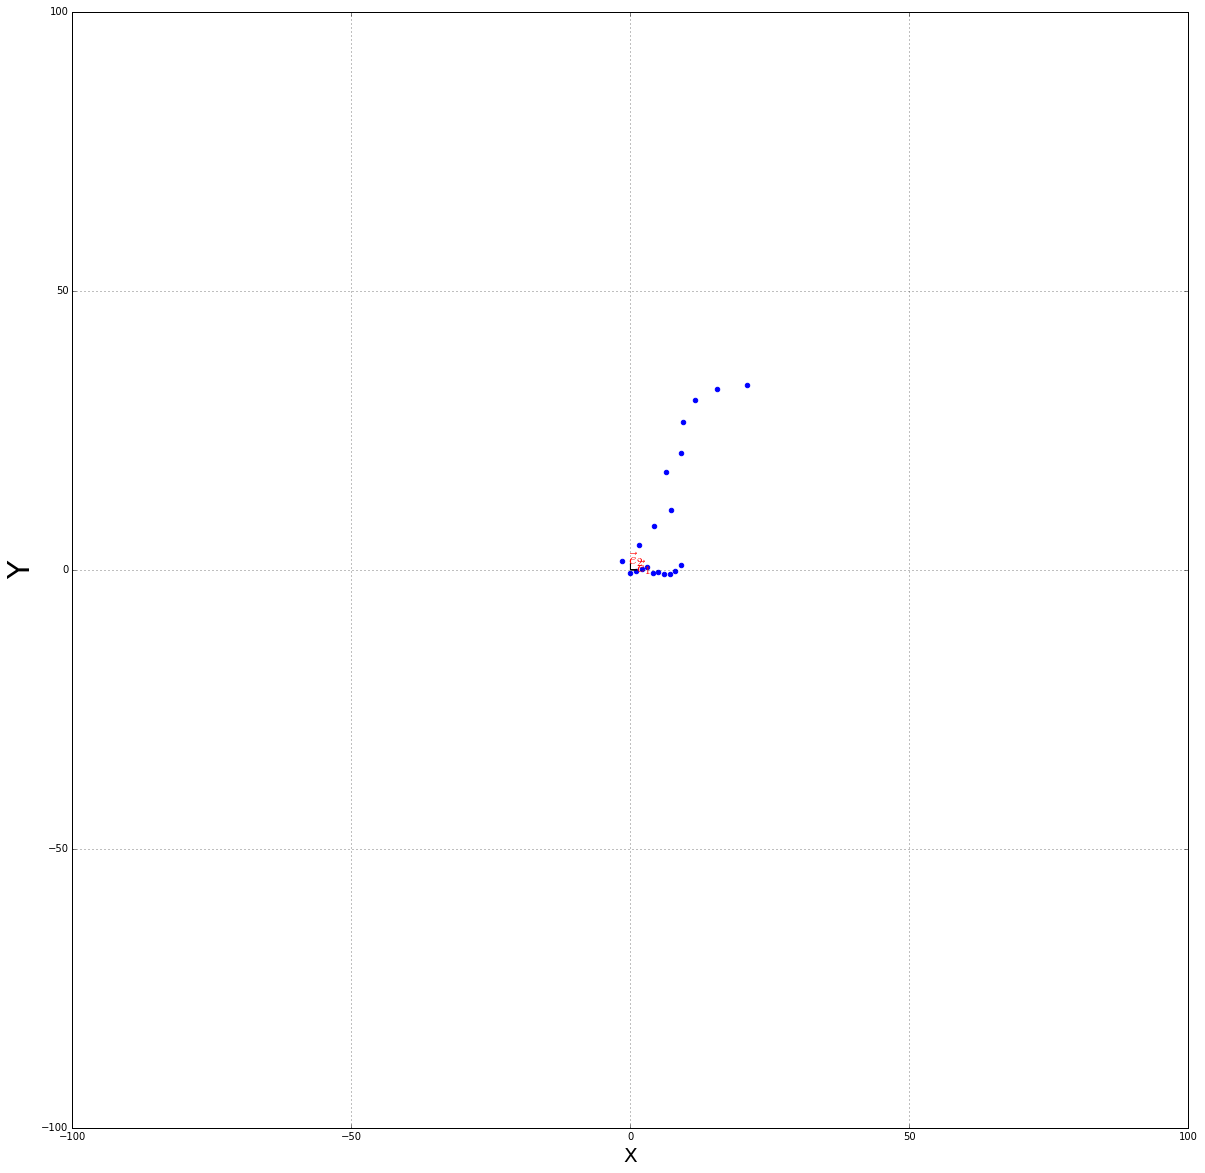

In [158]:
g = VectorGround(range=[-100,100])
#
z = np.array([matrix[:,0],matrix[:,1]]).T
g.plot_points(z)
z = np.array([matrix[:,2],matrix[:,3]]).T
g.plot_points(z)